In [11]:
from settings import *

In [12]:
H = create_hamiltonian(system), 0.1

In [13]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

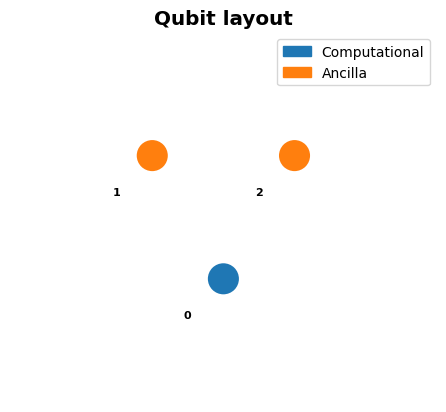

In [14]:
qubits.show_layout()

In [15]:
# theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100, theta_init=np.ones(circuit.P)*0.1)

# np.save("losses_theta_opt", theta_opt)
# np.save("losses_thetas", thetas)
# np.save("losses_errors", errors)

In [16]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [17]:
theta_opt

array([-1.01927171,  0.1       ,  0.1       , -0.69176989,  0.40404369,
        0.40404369, -1.0599763 ,  0.06788825,  0.06788825,  0.00450177,
       -1.13522743,  0.06788825,  0.06788825, -0.62474363,  0.39770725,
        0.39770725, -1.09744893,  0.05240679,  0.05240679, -0.00315331,
       -1.17194387,  0.05240679,  0.05240679, -0.55351574,  0.36980253,
        0.36980253, -1.2065541 ,  0.05638137,  0.05638137,  0.07208633,
       -1.25769405,  0.05638137,  0.05638137, -0.28583377,  0.32962659,
        0.32962659, -1.27270985,  0.07994835,  0.07994835,  0.08231902,
       -1.30751923,  0.07994835,  0.07994835, -0.16189596,  0.28300529,
        0.28300529, -1.31249075,  0.1       ,  0.1       ,  0.25613414])

rho_rand_haar: seed=49500


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

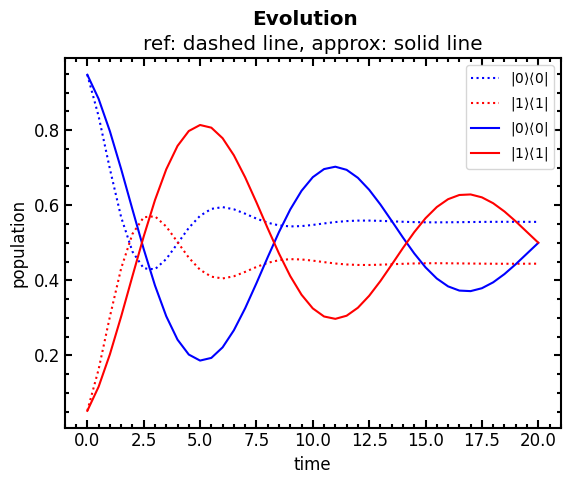

In [18]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

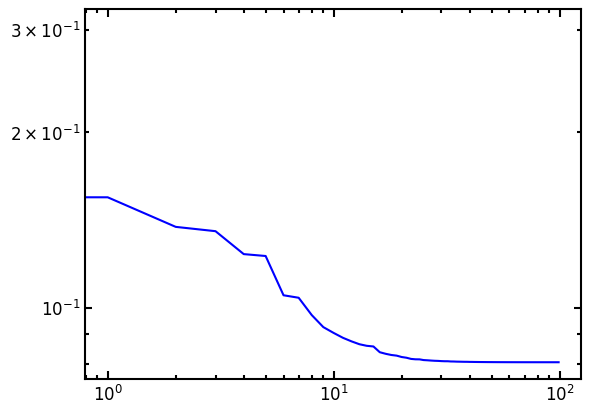

In [19]:
plt.loglog(errors)